In [4]:
import pandas as pd
import sklearn.datasets

import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import hello_world
hello_world()

Hello World!


## SKLearn Datasets

- https://scikit-learn.org/stable/datasets/index.html

Starting with the SKLearn datsets, let's examine what methods are part of `sklearn.datasets` to simplify data loading.



In [ ]:
for d in dir(sklearn.datasets):
    if d[:2] == "__" or d[:4] != "load":
        continue
    print(d)

load_boston
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


It should be noted that there are other methods within the `sklearn.datasets` module, and they should be explored as well.

But these methods give us toy datasets to test ML algorithms on and the behavior is typically well understood.

# Loading From Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls /content/drive/My\ Drive/data/2010Q1

Acquisition_2010Q1.txt	Performance_2010Q1.txt


# Financial Datasets

There are a large number of financial datasets that are available, the first one we will discuss is the Fannie Mae Fixed Rate Mortgage Dataset.

- https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html

- https://loanperformancedata.fanniemae.com/lppub/index.html#Portfolio

Which consists of both Acquisitions and Performance data for a collection of mortgages.

To make our lives a bit easier here are the column names pulled from the provided `R` script to load the data.  See `R` is good for at least one thing.

In [ ]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [ ]:
# Data path will change depending on your system setup.

base_location = "/content/drive/My Drive/data/"

acquisition_data_path = f"{base_location}2010Q1/Acquisition_2010Q1.txt"

#### Loading the Acquisition Data from CSV

To load the data we call from `pandas`, `pd.read_csv` which automatically handles loading data from the csv file.  We provide column names, a notification that the file doesn't include headers, and information on what the column separator is `|` in this case.

In [ ]:
acquisition_df = pd.read_csv(
    acquisition_data_path,
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)

In [13]:
acquisition_df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')

#### Loading the Performance Data

In [16]:
performance_data_path = "/data/FannieMae/2010Q1/Performance_2010Q1.txt"
performance_data_path = f"{base_location}2010Q1/Performance_2010Q1.txt"

performance_df = pd.read_csv(
    performance_data_path,
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First thing we note is that this takes longer than the `Acquisitions` data to load, stemming from the fact that for each loan there are multiple monthly data elements loaded.

In [ ]:
print(f"There are {len(acquisition_df.index)} rows in the Acquisition Dataframe")
print(f"There are {len(performance_df.index)} rows in the Performance Dataframe")

There are 323174 rows in the Acquisition Dataframe
There are 18080692 rows in the Performance Dataframe


#### More Information on Fannie Mae Dataset

For more information on the Fannie Mae Dataset see the associated GitHub repo.

In [ ]:
X = acquisition_df['CSCORE_B']

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9.00000e+00, 1.60000e+01, 1.73000e+02, 1.57300e+03, 7.06500e+03,
        2.24840e+04, 4.50150e+04, 7.64810e+04, 1.40172e+05, 2.98840e+04]),
 array([483. , 518.9, 554.8, 590.7, 626.6, 662.5, 698.4, 734.3, 770.2,
        806.1, 842. ]),
 <a list of 10 Patch objects>)

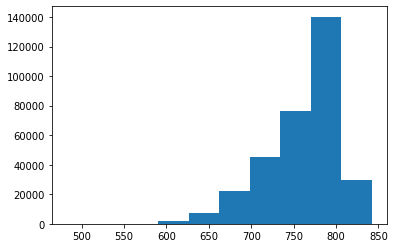

In [ ]:
plt.hist(X)

In [ ]:
STATES = acquisition_df['STATE']
print(np.unique(STATES))

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


In [ ]:
ZIP = list(acquisition_df['ZIP_3'])
from pprint import pprint
pprint(np.unique(ZIP))

array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 19

In [ ]:
SELLER = acquisition_df['Seller.Name']
SELLERS = np.unique(SELLER)
for seller in SELLERS:
    print(seller)

BANK OF AMERICA, N.A.
CITIMORTGAGE, INC.
CITIZENS BANK, NATIONAL ASSOCIATION
FLAGSTAR CAPITAL MARKETS CORPORATION
GMAC MORTGAGE, LLC
GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)
HSBC BANK USA, NATIONAL ASSOCIATION
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
OTHER
PHH MORTGAGE CORPORATION
PNC BANK, N.A.
SUNTRUST MORTGAGE INC.
U.S. BANK N.A.
WELLS FARGO BANK, N.A.
